In [1]:
!sudo apt update
!sudo apt install seqtk
!seqtk sample PBMC_4/simulated.fastq 1000000 > simulated_PBMC_4.fastq
!seqtk sample real_data/SC3pv3_GEX_Human_PBMC_ONT.fastq 1000000 > SC3pv3_GEX_Human_PBMC_ONT_1M.fastq

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
123 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
seqtk is already the newest version (1.3-2).
0 upgraded, 0 newly installed, 0 to remove and 123 not upgraded.


In [6]:
!minimap2 -t 25 -c -x map-ont /export/home1/ScNaUmi-seq_B2022/references/refdata-gex-GRCh38-2020-A/fasta/genome.fa\
simulated_PBMC_4.fastq | gzip > identity/simulated_PBMC_4_alignments.paf.gz

[M::mm_idx_gen::51.127*1.86] collected minimizers
[M::mm_idx_gen::54.441*2.63] sorted minimizers
[M::main::54.441*2.63] loaded/built the index for 194 target sequence(s)
[M::mm_mapopt_update::56.263*2.58] mid_occ = 705
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 194
[M::mm_idx_stat::57.176*2.56] distinct minimizers: 100159079 (38.79% are singletons); average occurrences: 5.540; average spacing: 5.586; total length: 3099750718
[M::worker_pipeline::116.136*13.62] mapped 560751 sequences
[M::worker_pipeline::140.775*13.22] mapped 439249 sequences
[M::main] Version: 2.28-r1209
[M::main] CMD: minimap2 -t 25 -c -x map-ont /export/home1/ScNaUmi-seq_B2022/references/refdata-gex-GRCh38-2020-A/fasta/genome.fa simulated_PBMC_4.fastq
[M::main] Real time: 141.028 sec; CPU: 1861.083 sec; Peak RSS: 11.361 GB


In [7]:
!minimap2 -t 25 -c -x map-ont /export/home1/ScNaUmi-seq_B2022/references/refdata-gex-GRCh38-2020-A/fasta/genome.fa\
 SC3pv3_GEX_Human_PBMC_ONT_1M.fastq | gzip > identity/SC3pv3_GEX_Human_PBMC_alignments.paf.gz

[M::mm_idx_gen::51.585*1.87] collected minimizers
[M::mm_idx_gen::54.870*2.64] sorted minimizers
[M::main::54.870*2.64] loaded/built the index for 194 target sequence(s)
[M::mm_mapopt_update::56.670*2.59] mid_occ = 705
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 194
[M::mm_idx_stat::57.579*2.56] distinct minimizers: 100159079 (38.79% are singletons); average occurrences: 5.540; average spacing: 5.586; total length: 3099750718
[M::worker_pipeline::98.341*11.38] mapped 561240 sequences
[M::worker_pipeline::115.356*11.43] mapped 438760 sequences
[M::main] Version: 2.28-r1209
[M::main] CMD: minimap2 -t 25 -c -x map-ont /export/home1/ScNaUmi-seq_B2022/references/refdata-gex-GRCh38-2020-A/fasta/genome.fa SC3pv3_GEX_Human_PBMC_ONT_1M.fastq
[M::main] Real time: 115.616 sec; CPU: 1318.324 sec; Peak RSS: 11.362 GB


### Align reads to get BAM

### Align reads with --MD flag

In [69]:
!minimap2 -ax map-ont --MD -t 20 \
/export/home1/ScNaUmi-seq_B2022/references/refdata-gex-GRCh38-2020-A/fasta/genome.fa \
SC3pv3_GEX_Human_PBMC_ONT_1M.fastq | samtools sort -o identity/sorted_SC3pv3_GEX_Human_PBMC_ONT_1M.bam -T temp
!samtools index identity/sorted_SC3pv3_GEX_Human_PBMC_ONT_1M.bam

[M::mm_idx_gen::51.076*1.87] collected minimizers
[M::mm_idx_gen::54.048*2.61] sorted minimizers
[M::main::54.048*2.61] loaded/built the index for 194 target sequence(s)
[M::mm_mapopt_update::55.782*2.56] mid_occ = 705
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 194
[M::mm_idx_stat::56.664*2.54] distinct minimizers: 100159079 (38.79% are singletons); average occurrences: 5.540; average spacing: 5.586; total length: 3099750718
[M::worker_pipeline::108.228*10.53] mapped 561240 sequences
[M::worker_pipeline::130.683*10.06] mapped 438760 sequences
[M::main] Version: 2.28-r1209
[M::main] CMD: minimap2 -ax map-ont --MD -t 20 /export/home1/ScNaUmi-seq_B2022/references/refdata-gex-GRCh38-2020-A/fasta/genome.fa SC3pv3_GEX_Human_PBMC_ONT_1M.fastq
[M::main] Real time: 130.963 sec; CPU: 1315.014 sec; Peak RSS: 11.399 GB
[bam_sort_core] merging from 2 files and 1 in-memory blocks...


In [11]:
!minimap2 -ax map-ont --MD -t 20 \
/export/home1/ScNaUmi-seq_B2022/references/refdata-gex-GRCh38-2020-A/fasta/genome.fa \
 PBMC_test_identity/simulated.fastq | samtools sort -o identity/sorted_simulated_PBMC_identity.bam -T temp
!samtools index identity/sorted_simulated_PBMC_identity.bam

[M::mm_idx_gen::53.816*1.92] collected minimizers
[M::mm_idx_gen::56.711*2.63] sorted minimizers
[M::main::56.711*2.63] loaded/built the index for 194 target sequence(s)
[M::mm_mapopt_update::58.470*2.58] mid_occ = 705
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 194
[M::mm_idx_stat::59.352*2.55] distinct minimizers: 100159079 (38.79% are singletons); average occurrences: 5.540; average spacing: 5.586; total length: 3099750718
[M::worker_pipeline::110.452*10.15] mapped 572936 sequences
[M::worker_pipeline::143.488*12.49] mapped 575152 sequences
[M::worker_pipeline::184.935*14.24] mapped 581986 sequences
[M::worker_pipeline::217.156*15.04] mapped 578029 sequences
[M::worker_pipeline::230.549*14.19] mapped 423354 sequences
[M::main] Version: 2.28-r1209
[M::main] CMD: minimap2 -ax map-ont --MD -t 20 /export/home1/ScNaUmi-seq_B2022/references/refdata-gex-GRCh38-2020-A/fasta/genome.fa PBMC_test_identity/simulated.fastq
[M::main] Real time: 230.840 sec; CPU: 3272.717 sec; Peak 

In [13]:
import pysam

def count_substitutions(bam_file):
    bam = pysam.AlignmentFile(bam_file, "rb")
    mis_dict = dict()
    substitution_counts = {
        'T>C': 0, 'A>G': 0, 'G>A': 0, 'C>T': 0, 'C>G': 0, 'G>C': 0, 'G>T': 0, 'T>A': 0, 'C>A': 0, 'A>T': 0
    }
    i = 0
    for read in bam.fetch():
        if i > 100000:
            break
        if not read.is_unmapped and not read.is_secondary:
            seq = read.query_sequence
            if seq is None:
                continue
            
            ref_positions = read.get_reference_positions()
            if not ref_positions:
                continue
                
            aligned_pairs = read.get_aligned_pairs(with_seq=True)
            count_mis = 0
            for q_pos, r_pos, ref_base in aligned_pairs:
                if q_pos is not None and r_pos is not None and ref_base is not None and q_pos < len(seq):
                    query_base = seq[q_pos].upper()
                    ref_base = ref_base.upper()
                    if query_base != ref_base:
                        substitution = f'{ref_base}>{query_base}'
                        if substitution in substitution_counts:
                           substitution_counts[substitution] += 1
                           i+=1
                           count_mis += 1
            
            if count_mis not in mis_dict:
                mis_dict[count_mis] = 0
                
            mis_dict[count_mis] += 1

    bam.close()
    return substitution_counts, mis_dict

In [15]:
bam_file = 'identity/sorted_SC3pv3_GEX_Human_PBMC_ONT_1M.bam'
real_sub_counts, real_mis = count_substitutions(bam_file)

In [14]:
bam_file = 'identity/sorted_simulated_PBMC_identity.bam'
sim_sub_counts, sim_mis = count_substitutions(bam_file)

After alignment to the human hg38 genome, we counted the number of mismatch and indel.

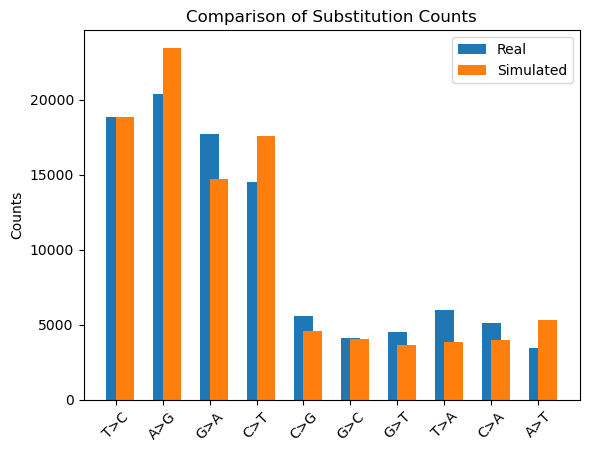

In [21]:
import matplotlib.pyplot as plt

labels = list(real_sub_counts.keys())
real_values = [real_sub_counts[label] for label in labels]
sim_values = [sim_sub_counts[label] for label in labels]

x = range(len(labels))  

fig, ax = plt.subplots()
ax.bar(x, real_values, width=0.4, label='Real', align='center')
ax.bar(x, sim_values, width=0.4, label='Simulated', align='edge')

ax.set_ylabel('Counts')
ax.set_title('Comparison of Substitution Counts')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.savefig("fig3.pdf", format="pdf")

plt.show()

### Minimap stats

In [4]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def plot_ed(ed_real, id_real,  ed_sim, id_sim):
    dict_sim = dict(Counter(ed_sim))
    
    dict_sim = dict(sorted(dict_sim.items()))
    
    dict_real = dict(Counter(ed_real))
    
    dict_real = dict(sorted(dict_real.items()))
    
    key_sim = list(dict_sim.keys())
    val_sim = list(dict_sim.values())
    key_real = list(dict_real.keys())
    val_real = list(dict_real.values())
    
    
    largeur_barre = 0.35
    plt.bar([i - largeur_barre/2 for i in range(len(key_sim))], val_sim, width=largeur_barre, label="Simulated data", color='#9467BD')
    plt.bar([i + largeur_barre/2 for i in range(len(key_real))], val_real, width=largeur_barre, label="Real data", color='#FF7F0E')
    
    # 
    etiquettes = key_real if len(key_real)>len(key_sim) else key_sim
    plt.xticks(range(len(etiquettes)), etiquettes)
    
    # 
    plt.xlabel('Edit distance (ED)')
    plt.ylabel('Count')
    plt.title('Edit distance from adapter sequence (22nt)') 
    plt_txt = max(val_real)/2
    plt.text(4,plt_txt, "% Id Real = {}%".format(round(id_real),1),{'color':'#FF7F0E','weight':'heavy','size':10})
    plt.text(4,plt_txt/2, "% Id Simulated ={}%".format(round(id_sim),1),{'color':'#9467BD','weight':'heavy','size':10})
    plt.legend()
    
    # 
    plt.savefig("fig2.pdf", format="pdf")
    plt.show()


def run_subprocess(cmd):
    """
    Run OS command and return stdout & stderr
    """
    p = subprocess.Popen(cmd, shell=True, stderr=subprocess.PIPE)
    stdout, stderr = p.communicate()
    return str(stdout), str(stderr)


def call_vsearch(tmp_fasta, adapters_fasta="adapter_seqs.fasta",  min_adapter_id=0.7):
    """ """
    tmp_vsearch = tmp_fasta.replace(".fasta", ".vsearch.tsv")

    vsearch_cmd = "vsearch --usearch_global {fasta} --db {adapters} \
    --threads 1 --minseqlength 20 --maxaccepts 5 --id {id} --strand plus \
    --wordlength 3 --minwordmatches 10 --output_no_hits --userfields \
    'query+target+id+alnlen+mism+opens+qilo+qihi+qstrand+tilo+tihi+ql+tl' \
    --userout {output}".format(
        fasta=tmp_fasta,
        id=min_adapter_id,
        adapters=adapters_fasta,
        output=tmp_vsearch,
    )
    stdout, stderr = run_subprocess(vsearch_cmd)
    print(stdout)
    print(stderr)
    return tmp_vsearch


def vsearsh_align(fasta, adapter):
    vsearch_cmd = call_vsearch(tmp_fasta=fasta, adapters_fasta=adapter,  min_adapter_id=0.7)
    colnames = [
            "query",
            "target",
            "id",
            "alnlen",
            "mism",
            "opens",
            "qilo",
            "qihi",
            "qstrand",
            "tilo",
            "tihi",
            "ql",
            "tl",
        ]
    
    df = pd.read_csv(vsearch_cmd, sep="\t", header=None, names=colnames)
    df = df[df.id != 0]
    df = df[df.alnlen == 22]
    os.remove(vsearch_cmd)
    return df.id.mean(), list(df.mism)

None
b'vsearch v2.23.0_linux_x86_64, 188.7GB RAM, 32 cores\nhttps://github.com/torognes/vsearch\n\nReading file error_profiling/fasta/adapter.fasta 100%\n44 nt in 2 seqs, min 22, max 22, avg 22\nMasking 100%\nCounting k-mers 100%\nCreating k-mer index 100%\nSearching 100%\nMatching unique query sequences: 2062 of 2130 (96.81%)\n'
None
b'vsearch v2.23.0_linux_x86_64, 188.7GB RAM, 32 cores\nhttps://github.com/torognes/vsearch\n\nReading file error_profiling/fasta/adapter.fasta 100%\n44 nt in 2 seqs, min 22, max 22, avg 22\nMasking 100%\nCounting k-mers 100%\nCreating k-mer index 100%\nSearching 100%\nMatching unique query sequences: 2096 of 2130 (98.40%)\n'


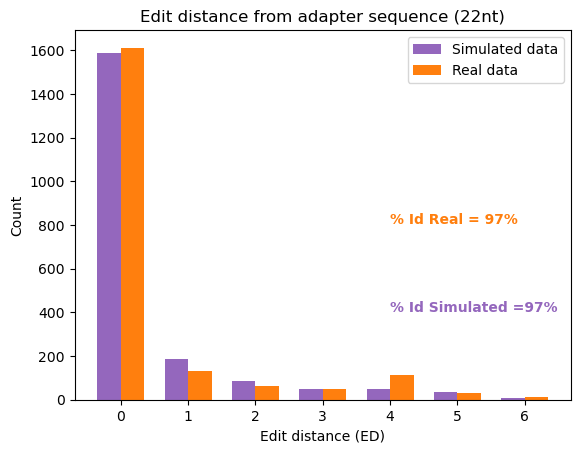

In [3]:
fasta_real = "PBMC_test_identity/SC3pv3_GEX_Human_PBMC_ONT_2177.fasta" #SC3pv3_GEX_Human_PBMC_ONT_1M.fasta" 
fasta_Sim = "PBMC_test_identity/simulated.fasta" #simulated_PBMC_3.fasta"
adapter = "error_profiling/fasta/adapter.fasta"

acc_real, ed_real= vsearsh_align(fasta_real, adapter)
acc_sim, ed_sim = vsearsh_align(fasta_Sim, adapter)

plot_ed(ed_real=ed_real, id_real=acc_real, ed_sim=ed_sim, id_sim=acc_sim)

None
b'vsearch v2.23.0_linux_x86_64, 188.7GB RAM, 32 cores\nhttps://github.com/torognes/vsearch\n\nReading file error_profiling/fasta/adapter.fasta 100%\n44 nt in 2 seqs, min 22, max 22, avg 22\nMasking 100%\nCounting k-mers 100%\nCreating k-mer index 100%\nSearching 100%\nMatching unique query sequences: 971102 of 1000000 (97.11%)\n'
None
b'vsearch v2.23.0_linux_x86_64, 188.7GB RAM, 32 cores\nhttps://github.com/torognes/vsearch\n\nReading file error_profiling/fasta/adapter.fasta 100%\n44 nt in 2 seqs, min 22, max 22, avg 22\nMasking 100%\nCounting k-mers 100%\nCreating k-mer index 100%\nSearching 100%\nMatching unique query sequences: 985932 of 1000000 (98.59%)\n'


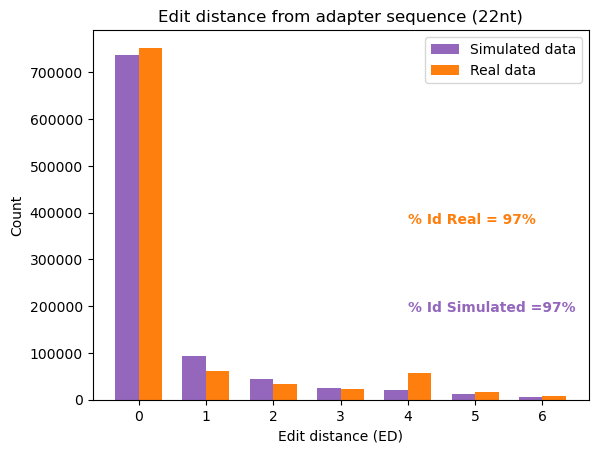

In [8]:
fasta_real = "SC3pv3_GEX_Human_PBMC_ONT_1M.fasta" 
fasta_Sim = "PBMC_test_identity/simulated.fasta" #simulated_PBMC_3.fasta"
adapter = "error_profiling/fasta/adapter.fasta"

acc_real, ed_real= vsearsh_align(fasta_real, adapter)
acc_sim, ed_sim = vsearsh_align(fasta_Sim, adapter)

plot_ed(ed_real=ed_real, id_real=acc_real, ed_sim=ed_sim, id_sim=acc_sim)